# 시계열 영향 배제하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("Health_systems.csv")
train = pd.read_csv('train.csv') # 확진자수 데이터
pop = pd.read_csv('population.csv') # 인구, 인구밀도 데이터

In [2]:
print(data.shape, train.shape, pop.shape)

(210, 14) (35995, 6) (219, 22)


In [3]:
data.head(3)

,Country_Region,Province_State,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
0,Afghanistan,NaN,Afghanistan,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,NaN
1,Albania,NaN,Albania,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0
2,Algeria,NaN,Algeria,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,NaN


In [4]:
# 5월 15일(최종) 확진자 수와 사망자 수만 뽑아보자! 
train.head(3)

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0


In [5]:
train.isna().sum()

Id                    0
Province_State    20700
Country_Region        0
Date                  0
ConfirmedCases        0
Fatalities            0
dtype: int64

In [6]:
# 전처리
train['Date'] = pd.to_datetime(train.Date)
train['country_province'] = train['Province_State']
train.country_province.fillna(train['Country_Region'], inplace=True) # 결측치 채움

In [7]:
train.head(3)

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,country_province
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0,Afghanistan
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0,Afghanistan
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0,Afghanistan


In [8]:
train = train.loc[train['Date'] == '2020-05-15']
train.reset_index(inplace=True)

In [9]:
train.shape

(313, 8)

In [10]:
# Province_State 이 다른 열 출력 
train.Province_State.fillna(value=0, inplace=True)
train.loc[train['Province_State'] != 0 ].head(3)

,index,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,country_province
8,1034,1035,Australian Capital Territory,Australia,2020-05-15,107.0,3.0,Australian Capital Territory
9,1149,1150,New South Wales,Australia,2020-05-15,3074.0,45.0,New South Wales
10,1264,1265,Northern Territory,Australia,2020-05-15,29.0,0.0,Northern Territory


결정했어! 결측 먼저 제거하고! 넣는거야! 

In [11]:
data['country_province'] = data['Province_State']
data.country_province.fillna(data['Country_Region'], inplace=True) # 결측치 채움

In [12]:
train = train.merge(pop, how='left', left_on = ['country_province'], right_on=['country'])
train = train.merge(data, how='left', on=["Country_Region"])
train.head()

,index,Id,Province_State_x,Country_Region,Date,ConfirmedCases,Fatalities,country_province_x,country,pop,...,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16,country_province_y
0,114,115,0,Afghanistan,2020-05-15,6053.0,153.0,Afghanistan,Afghanistan,"38,928,346",...,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,NaN,Afghanistan
1,229,230,0,Albania,2020-05-15,916.0,31.0,Albania,Albania,"2,877,797",...,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0,Albania
2,344,345,0,Algeria,2020-05-15,6629.0,536.0,Algeria,Algeria,"43,851,044",...,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,NaN,Algeria
3,459,460,0,Andorra,2020-05-15,761.0,49.0,Andorra,Andorra,"77,265",...,41.7,3834.7,4978.7,NaN,3.3,4.0,83.1,100.0,80.0,Andorra
4,574,575,0,Angola,2020-05-15,48.0,2.0,Angola,NaN,NaN,...,35.2,95.2,185.8,3.6,0.2,1.3,NaN,25.0,NaN,Angola


In [13]:
# train.fillna(value=0, inplace=True)

In [14]:
train.head(3)

,index,Id,Province_State_x,Country_Region,Date,ConfirmedCases,Fatalities,country_province_x,country,pop,...,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16,country_province_y
0,114,115,0,Afghanistan,2020-05-15,6053.0,153.0,Afghanistan,Afghanistan,"38,928,346",...,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,NaN,Afghanistan
1,229,230,0,Albania,2020-05-15,916.0,31.0,Albania,Albania,"2,877,797",...,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0,Albania
2,344,345,0,Algeria,2020-05-15,6629.0,536.0,Algeria,Algeria,"43,851,044",...,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,NaN,Algeria


In [15]:
train.columns

Index(['index', 'Id', 'Province_State_x', 'Country_Region', 'Date',
       'ConfirmedCases', 'Fatalities', 'country_province_x', 'country', 'pop',
       'tests', 'testpop', 'density', 'medianage', 'urbanpop', 'quarantine',
       'schools', 'restrictions', 'hospibed', 'smokers', 'sex0', 'sex14',
       'sex25', 'sex54', 'sex64', 'sex65plus', 'sexratio', 'lung',
       'femalelung', 'malelung', 'Province_State_y', 'World_Bank_Name',
       'Health_exp_pct_GDP_2016', 'Health_exp_public_pct_2016',
       'Health_exp_out_of_pocket_pct_2016', 'Health_exp_per_capita_USD_2016',
       'per_capita_exp_PPP_2016', 'External_health_exp_pct_2016',
       'Physicians_per_1000_2009-18', 'Nurse_midwife_per_1000_2009-18',
       'Specialist_surgical_per_1000_2008-18',
       'Completeness_of_birth_reg_2009-18',
       'Completeness_of_death_reg_2008-16', 'country_province_y'],
      dtype='object')

In [16]:
train.drop(columns=['index', 'Id', 'Province_State_x', 'Country_Region', 'Date', 'Province_State_y', 'World_Bank_Name', 'country_province_y', 'country'], inplace=True)

In [18]:
# 중복 행 제거
train = train.drop_duplicates()
train.shape

(496, 35)

In [19]:
# 아예 결측 없는 요소는 요 하나 밖에 없넹 ^ㅁ^
train.dropna(axis=0)

,ConfirmedCases,Fatalities,country_province_x,pop,tests,testpop,density,medianage,urbanpop,quarantine,...,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
250,16589.0,266.0,Israel,"8,655,535",3872.0,2235.417097,400.0,30.0,93.0,3/19/2020,...,62.5,23.0,2837.1,2843.0,1.5,3.2,5.2,75.6,100.0,100.0


In [20]:
# 나라 이름 인코딩
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
train['country_province_x'] = lb.fit_transform(train.country_province_x)

In [21]:
# 나라를 인덱스로 만듦
train = train.set_index('country_province_x').reset_index(drop=True)

In [22]:
train.head(2)

,ConfirmedCases,Fatalities,pop,tests,testpop,density,medianage,urbanpop,quarantine,schools,...,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
0,6053.0,153.0,"38,928,346",NaN,NaN,60.0,18.0,25.0,NaN,NaN,...,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,NaN
1,916.0,31.0,"2,877,797",NaN,NaN,105.0,36.0,63.0,NaN,NaN,...,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0


In [23]:
train.isna().sum()

ConfirmedCases                            0
Fatalities                                0
pop                                     321
tests                                   442
testpop                                 442
density                                 321
medianage                               321
urbanpop                                321
quarantine                              458
schools                                 387
restrictions                            413
hospibed                                321
smokers                                 384
sex0                                    334
sex14                                   334
sex25                                   334
sex54                                   334
sex64                                   334
sex65plus                               334
sexratio                                335
lung                                    348
femalelung                              348
malelung                        

In [24]:
# 결측치 400개 이상 열 삭제
train = train.drop(['tests', 'testpop', 'quarantine', 'restrictions', 'schools', 'Completeness_of_death_reg_2008-16', 'smokers'], axis=1)

In [25]:
# 우선 pop 결측치 아닌 것부터 뽑음
train['pop'].fillna(value=0, inplace=True)

In [26]:
pop_del = train.loc[train['pop']!=0]
pop_del.shape

(175, 27)

In [27]:
pop_del.isna().sum()

ConfirmedCases                           0
Fatalities                               0
pop                                      0
density                                  0
medianage                                0
urbanpop                                 0
hospibed                                 0
sex0                                    13
sex14                                   13
sex25                                   13
sex54                                   13
sex64                                   13
sex65plus                               13
sexratio                                14
lung                                    27
femalelung                              27
malelung                                28
Health_exp_pct_GDP_2016                 27
Health_exp_public_pct_2016              27
Health_exp_out_of_pocket_pct_2016       27
Health_exp_per_capita_USD_2016          27
per_capita_exp_PPP_2016                 27
External_health_exp_pct_2016            46
Physicians_

In [28]:
pop_del.to_csv('train2.csv', index=False)

In [33]:
train3 = pd.read_csv('train3.csv')
train3.head()

,ConfirmedCases,Fatalities,pop,density,medianage,urbanpop,hospibed,sex0,sex14,sex25,...,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18
0,6053,153,"38,928,346",60,18,25,0.5,1.05,1.03,1.03,...,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3
1,916,31,"2,877,797",105,36,63,2.9,1.08,1.11,1.09,...,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4
2,6629,536,"43,851,044",18,29,73,1.9,1.05,1.05,1.05,...,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0
3,761,49,"77,265",164,45,88,2.5,1.07,1.05,1.08,...,10.4,49.1,41.7,3834.7,4978.7,NaN,3.3,4.0,83.1,100.0
4,25,3,"97,929",223,34,26,3.8,1.05,1.03,0.99,...,4.3,60.6,32.2,623.1,976.4,0.0,2.8,3.1,14.0,NaN


In [34]:
train3.isna().sum()

ConfirmedCases                           0
Fatalities                               0
pop                                      0
density                                  0
medianage                                0
urbanpop                                 0
hospibed                                 0
sex0                                    13
sex14                                   13
sex25                                   13
sex54                                   13
sex64                                   13
sex65plus                               13
sexratio                                14
lung                                    27
femalelung                              27
malelung                                28
Health_exp_pct_GDP_2016                  9
Health_exp_public_pct_2016               9
Health_exp_out_of_pocket_pct_2016        9
Health_exp_per_capita_USD_2016           9
per_capita_exp_PPP_2016                  9
External_health_exp_pct_2016            30
Physicians_

In [37]:
# 결측치 제거
train3 = train3.dropna()

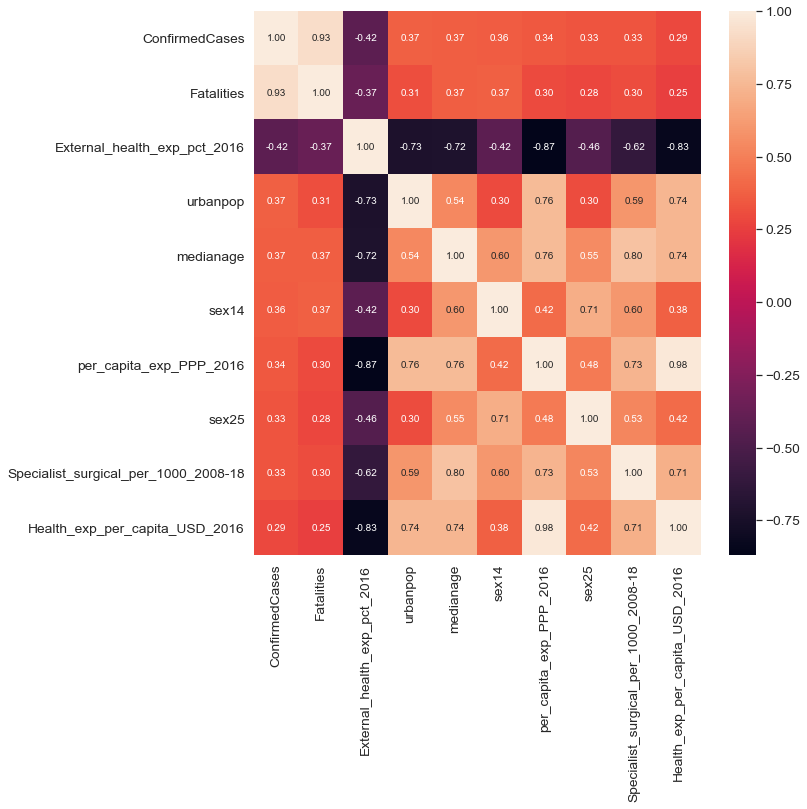

In [38]:
# 상관계수 비교
import scipy as sp 
cor_abs = abs(train3.corr(method='spearman'))
cor_cols = cor_abs.nlargest(n=10, columns='ConfirmedCases').index
cor = np.array(sp.stats.spearmanr(train3[cor_cols].values))[0]
plt.figure(figsize=(10,10))
sns.set(font_scale=1.25)
sns.heatmap(cor, fmt='.2f', annot=True, annot_kws={'size':10}, 
            xticklabels=cor_cols.values, yticklabels=cor_cols.values)

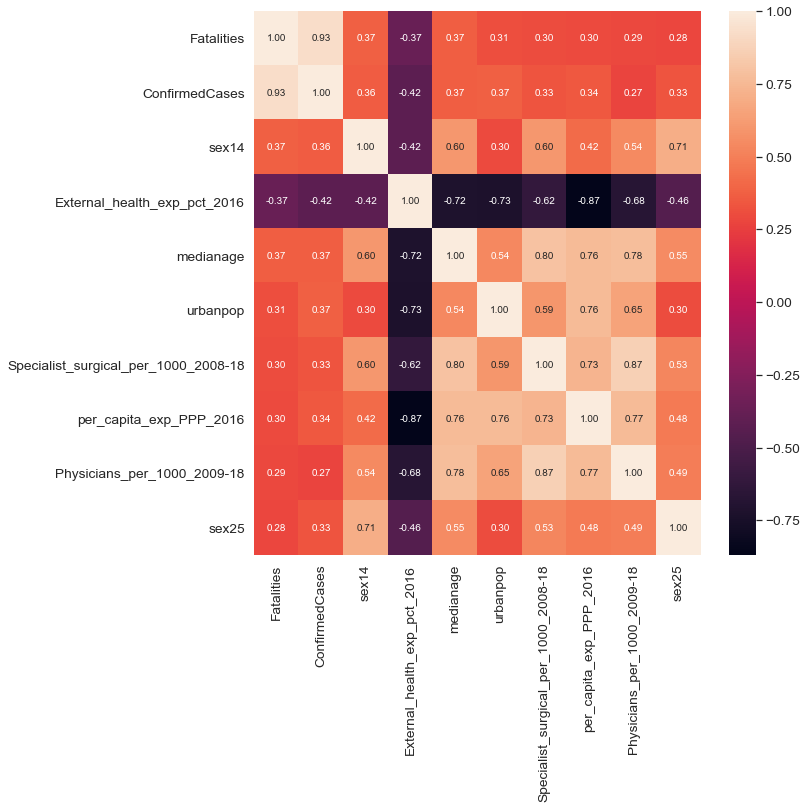

In [39]:
import scipy as sp 
cor_abs = abs(train3.corr(method='spearman'))
cor_cols = cor_abs.nlargest(n=10, columns='Fatalities').index
cor = np.array(sp.stats.spearmanr(train3[cor_cols].values))[0]
plt.figure(figsize=(10,10))
sns.set(font_scale=1.25)
sns.heatmap(cor, fmt='.2f', annot=True, annot_kws={'size':10}, 
            xticklabels=cor_cols.values, yticklabels=cor_cols.values)

In [41]:
train3['pop'] = train3['pop'].str.replace(",", "").astype('float64')

In [42]:
train3.to_csv('train5.csv', index=False)

In [44]:
train3.head()

,ConfirmedCases,Fatalities,pop,density,medianage,urbanpop,hospibed,sex0,sex14,sex25,...,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18
0,6053,153,38928346.0,60,18,25,0.5,1.05,1.03,1.03,...,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3
1,916,31,2877797.0,105,36,63,2.9,1.08,1.11,1.09,...,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4
2,6629,536,43851044.0,18,29,73,1.9,1.05,1.05,1.05,...,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0
5,7479,356,45195774.0,17,32,93,5.0,1.05,1.06,1.05,...,7.5,74.4,15.8,955.2,1531.0,0.6,4.0,2.6,50.1,100.0
6,4044,52,2963243.0,104,35,63,4.2,1.13,1.14,1.06,...,9.9,16.5,80.6,358.8,876.9,1.7,2.9,5.6,86.7,99.3


In [50]:
# train, test 데이터 구성(사망자 예측)

from sklearn.model_selection import train_test_split
X_train = train3.drop(['Fatalities'], axis=1).iloc[:-20]
y_train = train3['Fatalities'][:-20]

X_test = train3.drop(['Fatalities'], axis=1).iloc[-20:]
y_test = train3['Fatalities'][-20:]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(77, 26) (77,) (20, 26) (20,)


In [53]:
# 회귀 적합
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

In [55]:
from sklearn.metrics import mean_squared_error
print("RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE :  6731.105553440527


너무신나구요

In [57]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators= 400, max_depth=6, random_state=0, verbose=0, n_jobs=-1)
rf.fit(X_train, y_train)
pred_y = rf.predict(X_test)
print("RMSE : ", np.sqrt(mean_squared_error(y_test, pred_y)))

RMSE :  2476.8831648823375


In [58]:
train3

,ConfirmedCases,Fatalities,pop,density,medianage,urbanpop,hospibed,sex0,sex14,sex25,...,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18
0,6053,153,38928346.0,60,18,25,0.5,1.05,1.03,1.03,...,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3
1,916,31,2877797.0,105,36,63,2.9,1.08,1.11,1.09,...,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4
2,6629,536,43851044.0,18,29,73,1.9,1.05,1.05,1.05,...,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0
5,7479,356,45195774.0,17,32,93,5.0,1.05,1.06,1.05,...,7.5,74.4,15.8,955.2,1531.0,0.6,4.0,2.6,50.1,100.0
6,4044,52,2963243.0,104,35,63,4.2,1.13,1.14,1.06,...,9.9,16.5,80.6,358.8,876.9,1.7,2.9,5.6,86.7,99.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,36772,1588,3989167.0,57,38,58,2.6,1.08,1.11,1.11,...,17.1,81.8,11.1,9869.7,9869.7,0.0,2.6,8.6,54.7,100.0
164,17330,476,43733762.0,75,41,69,8.8,1.06,1.06,1.05,...,6.7,42.4,54.3,141.2,534.2,0.8,3.0,7.1,86.6,100.0
169,236711,33998,67886011.0,281,40,83,2.8,1.05,1.05,1.04,...,9.8,80.2,15.1,3958.0,4177.8,0.0,2.8,8.3,133.3,100.0
170,732,19,3473730.0,20,36,96,2.8,1.04,1.04,1.03,...,9.1,71.7,17.4,1379.1,1958.9,0.0,5.0,1.9,38.9,100.0
